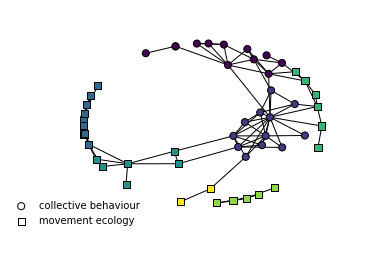

In [121]:
import numpy as np
import community
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

random.seed(0)

% matplotlib inline

df=pd.read_csv('author_list.txt',names=['lastname','firstname'])
authDF = pd.read_csv('author_mecb.csv',index_col=0)


df['community']=0
adj = np.load('network.npy')



G = nx.from_numpy_matrix(adj)


labels={}
cb=[]
me=[]
cbi=[]
mei=[]
idx = 0
for ind,author in df.iterrows():
    if np.sum(adj[:,ind]):
        labels[ind]=author.lastname
        
        if authDF[authDF['lastname']==author.lastname]['comm'].iloc[0]=='cb':
            cb.append(ind)
            cbi.append(idx)
        else:
            me.append(ind)
            mei.append(idx)
        idx+=1
G.remove_nodes_from(nx.isolates(G))
pos1=nx.circular_layout(G)
pos=nx.spring_layout(G,k=0.1,iterations=2000,pos=pos1) # positions for all nodes


parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

nx.draw_networkx_nodes(G,pos, nodelist=[cb[0]],node_color='white', node_size=50,node_shape='o',label='collective behaviour')
nx.draw_networkx_nodes(G,pos, nodelist=[me[0]],node_color='white', node_size=50,node_shape='s',label='movement ecology')
nx.draw_networkx_nodes(G,pos, cmap=plt.get_cmap('viridis'), nodelist=cb, vmax=6,vmin=0,node_color=np.asarray(values)[np.array(cbi)].tolist(), node_size=50,node_shape='o')
nx.draw_networkx_nodes(G,pos, cmap=plt.get_cmap('viridis'), nodelist=me, vmax=6,vmin=0, node_color=np.asarray(values)[np.array(mei)].tolist(), node_size=50,node_shape='s')
nx.draw_networkx_edges(G,pos)

plt.axis('off')
plt.legend(scatterpoints=1,loc=3,frameon=False, bbox_to_anchor=(-0.1,-0.0),fontsize='medium')
plt.savefig('network.png',dpi=300)
plt.show()



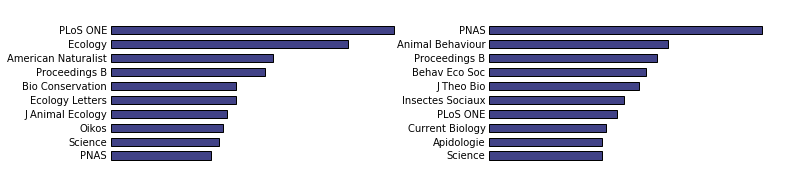

In [199]:
#me_journals = np.loadtxt()
cmap = plt.get_cmap('viridis')
jme = open('me_journals.txt', "r")
journals = np.asarray(jme.read().splitlines())
jcounts, counts = np.unique(journals, return_counts=True)
topC = 10
ind = counts.argsort()[::-1][:topC]

longnames = jcounts[ind]

longnames = np.array(['PLoS ONE', 'Ecology', 'American Naturalist',
       'Proceedings of the Royal Society B: Biological Sciences',
       'Biological Conservation', 'Ecology Letters',
       'Journal of Animal Ecology', 'Oikos', 'Science',
       'Proceedings of the National Academy of Sciences of the United States of America',
       'Oecologia', 'Nature', 'Ecological Applications',
       'Scientific Reports', 'Journal of Applied Ecology',
       'Animal Behaviour', 'Journal of Ornithology',
       'Canadian Journal of Zoology', 'Functional Ecology',
       'Animal Conservation'],
      dtype='<U178')

shortnames = np.array(['PLoS ONE', 'Ecology', 'American Naturalist',
       'Proceedings B',
       'Bio Conservation', 'Ecology Letters',
       'J Animal Ecology', 'Oikos', 'Science',
       'PNAS',
       'Oecologia', 'Nature', 'Ecological Applications',
       'Scientific Reports', 'J Applied Ecology',
       'Animal Behaviour', 'J Ornithology',
       'Canadian J Zoology', 'Functional Ecology',
       'Animal Conservation'],
      dtype='<U178')



#me_journals = np.loadtxt()
jcb = open('cb_journals.txt', "r")
journals = np.asarray(jcb.read().splitlines())
jcbcounts, cbcounts = np.unique(journals, return_counts=True)
indCB = cbcounts.argsort()[::-1][:topC]

longnames = jcbcounts[ind]

longnames=np.array([ 'Proceedings of the National Academy of Sciences of the United States of America',
       'Animal Behaviour',
       'Proceedings of the Royal Society B: Biological Sciences',
       'Behavioral Ecology and Sociobiology',
       'Journal of Theoretical Biology', 'Insectes Sociaux', 'PLoS ONE',
       'Current Biology', 'Apidologie', 'Science', 'American Naturalist',
       'Journal of the Royal Society Interface',
       'Trends in Ecology and Evolution', 'Nature',
       'Philosophical Transactions of the Royal Society B: Biological Sciences'],
      dtype='<U197')

shortnamesCB=np.array([ 'PNAS',
       'Animal Behaviour',
       'Proceedings B',
       'Behav Eco Soc',
       'J Theo Bio', 'Insectes Sociaux', 'PLoS ONE',
       'Current Biology', 'Apidologie', 'Science', 'American Naturalist',
       'J Royal Soc Interface',
       'TREE', 'Nature',
       'Phil Trans B'],
      dtype='<U197')

width = 12
height = 3

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(width, height))
width=0.6
xind = np.arange(len(counts[ind]),0,-1)  # the x locations for the groups
ax1.barh(xind, counts[ind], width,color=cmap(50))
ax1.set_yticks(xind+width/2)
ax1.set_yticklabels(shortnames[:10], minor=False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)


ax1.get_xaxis().set_ticks([])
#ax1.get_yaxis().set_ticks([])

width=0.6
xind = np.arange(len(cbcounts[indCB]),0,-1)  # the x locations for the groups
ax2.barh(xind, cbcounts[indCB], width,color=cmap(50))
ax2.set_yticks(xind+width/2)
ax2.set_yticklabels(shortnamesCB, minor=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)

ax2.get_xaxis().set_ticks([])
#ax1.get_yaxis().set_ticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig('journals.png',dpi=300)
plt.show()

In [193]:
#!/usr/bin/env python
"""
Minimal Example
===============

Generating a square wordcloud from the US constitution using default arguments.
"""

from os import path

from wordcloud import WordCloud, STOPWORDS

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("however")
stopwords.add("using")
stopwords.add("use")
stopwords.add("used")
stopwords.add("also")
stopwords.add("two")
stopwords.add("show")


#d = path.dirname(__file__)

# Read the whole text.
text = open('me_text.txt').read()
import operator
# Generate a word cloud image
mewordcloud = WordCloud(stopwords=stopwords).generate(text)

sorted_me = sorted(mewordcloud.words_.items(), key=operator.itemgetter(1),reverse=True)



# Read the whole text.
text = open('cb_text.txt').read()

# Generate a word cloud image
cbwordcloud = WordCloud(stopwords=stopwords).generate(text)



sorted_cb = sorted(cbwordcloud.words_.items(), key=operator.itemgetter(1),reverse=True)


#for i in range(20):
#    print(sorted_me[i][0])
#print('======')
#for i in range(20):
#    print(sorted_cb[i][0])

    
# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

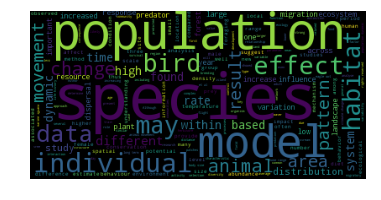

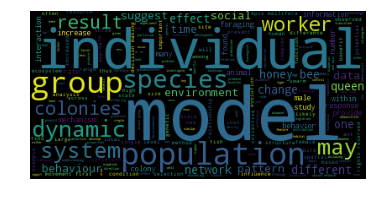

In [196]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(mewordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('me_cloud.png',dpi=600,bbox_inches='tight')
plt.show()

plt.figure()


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(cbwordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cb_cloud.png',dpi=600,bbox_inches='tight')
plt.show()


In [192]:
sorted_me

[('specie', 1.0),
 ('population', 0.8872727272727273),
 ('model', 0.6690909090909091),
 ('individual', 0.5809090909090909),
 ('effect', 0.51),
 ('habitat', 0.48818181818181816),
 ('may', 0.47909090909090907),
 ('bird', 0.46545454545454545),
 ('data', 0.43636363636363634),
 ('change', 0.4309090909090909),
 ('animal', 0.4109090909090909),
 ('area', 0.38181818181818183),
 ('movement', 0.36363636363636365),
 ('pattern', 0.34545454545454546),
 ('result', 0.34363636363636363),
 ('different', 0.3409090909090909),
 ('time', 0.31),
 ('high', 0.30818181818181817),
 ('system', 0.2872727272727273),
 ('dynamic', 0.2809090909090909),
 ('found', 0.2790909090909091),
 ('based', 0.2772727272727273),
 ('within', 0.27090909090909093),
 ('rate', 0.2609090909090909),
 ('distribution', 0.25727272727272726),
 ('study', 0.25363636363636366),
 ('response', 0.24909090909090909),
 ('increase', 0.24727272727272728),
 ('large', 0.24545454545454545),
 ('predator', 0.24363636363636362),
 ('across', 0.241818181818181